In [1]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions, tf_links
)
import torch

In [2]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    # "mirna": mirna_loader,
    # "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [3]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=100,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

/home/lubojjan/DiplomaThesis2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-12 16:24:58,569] A new study created in memory with name: no-name-7112c13f-29f9-40c2-9be0-44b6339e208e
[I 2024-12-12 16:24:58,634] Trial 0 finished with value: 0.29145508692365835 and parameters: {'booster': 'gbtree', 'lambda': 8.036563426209676e-08, 'alpha': 3.776526657742263e-07, 'max_depth': 8, 'eta': 0.003510946371730911, 'gamma': 6.182676833738006e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.29145508692365835.
[I 2024-12-12 16:24:58,698] Trial 1 finished with value: 0.2582725925925926 and parameters: {'booster': 'dart', 'lambda': 0.5774561807711676, 'alpha': 2.419968598207635e-07, 'max_depth': 5, 'eta': 3.918281526483027e-06, 'gamma': 1.0203874752708883e-07, 'grow_policy': 'lossguide', 

New best score: 0.291
Best model performance:
Accuracy: 0.693 ± 0.090
F1 Macro: 0.637 ± 0.151
F1 Weighted: 0.660 ± 0.128
[{'acc': 0.6666666666666666, 'f1_macro': np.float64(0.6666666666666666), 'f1_weighted': np.float64(0.6666666666666666)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.6)}, {'acc': 0.6, 'f1_macro': np.float64(0.375), 'f1_weighted': np.float64(0.45)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}]


[I 2024-12-12 16:24:58,856] Trial 3 finished with value: 0.29145508692365835 and parameters: {'booster': 'dart', 'lambda': 1.516812237439313e-07, 'alpha': 8.605322248924562e-07, 'max_depth': 7, 'eta': 0.011348337797885225, 'gamma': 0.259753984380859, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.011776515790792938, 'skip_drop': 1.2925463418745468e-08}. Best is trial 0 with value: 0.29145508692365835.
[I 2024-12-12 16:24:58,914] Trial 4 finished with value: 0.2840100075585789 and parameters: {'booster': 'gbtree', 'lambda': 8.789035048748424e-05, 'alpha': 5.0645192033997755e-08, 'max_depth': 8, 'eta': 0.00020749409111126267, 'gamma': 3.0542058824999816e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.29145508692365835.
[I 2024-12-12 16:24:58,958] Trial 5 finished with value: 0.7690415600907027 and parameters: {'booster': 'gblinear', 'lambda': 0.2636523070915474, 'alpha': 0.07907065386997847}. Best is trial 5 with value: 0.

New best score: 0.769
Best model performance:
Accuracy: 0.920 ± 0.098
F1 Macro: 0.912 ± 0.108
F1 Weighted: 0.916 ± 0.103
[{'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-12-12 16:24:59,174] Trial 9 finished with value: 0.5974049281934997 and parameters: {'booster': 'gblinear', 'lambda': 0.0945909133199284, 'alpha': 0.000226808497447179}. Best is trial 5 with value: 0.7690415600907027.
[I 2024-12-12 16:24:59,252] Trial 10 finished with value: 0.4458353030990173 and parameters: {'booster': 'gblinear', 'lambda': 0.0016042136360178661, 'alpha': 0.23497934715344065}. Best is trial 5 with value: 0.7690415600907027.
[I 2024-12-12 16:24:59,298] Trial 11 finished with value: 0.5974049281934997 and parameters: {'booster': 'gblinear', 'lambda': 0.013762285832779298, 'alpha': 0.0030148562745586083}. Best is trial 5 with value: 0.7690415600907027.
[I 2024-12-12 16:24:59,344] Trial 12 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 0.010626934904527163, 'alpha': 0.007612935062342309}. Best is trial 5 with value: 0.7690415600907027.
[I 2024-12-12 16:24:59,391] Trial 13 finished with value: 0.6788906666666669 and param

Best model performance:
Accuracy: 0.920 ± 0.098
F1 Macro: 0.912 ± 0.108
F1 Weighted: 0.916 ± 0.103
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.2636523070915474, 'alpha': 0.07907065386997847}


In [4]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}
{'ENSG00000178773': [-0.09645207971334457, 0.09252093732357025], 'ENSG00000137831': [0.0, -2.50129378400743e-05], 'ENSG00000186446': [2.0674495317507535e-05, 0.0], 'ENSG00000234616': [0.0906403437256813, -0.09020525962114334], 'ENSG00000077935': [-0.07812362164258957, 0.07709059119224548], 'ENSG00000180336': [-0.08284261077642441, 0.08343552052974701], 'ENSG00000244165': [-0.06820205599069595, 0.06880919635295868], 'ENSG00000080493': [0.05562322959303856, -0.05715832859277725], 'ENSG00000005187': [0.039728887379169464, -0.041906777769327164], 'ENSG00000023445': [0.06988885998725891, -0.07188782095909119], 'ENSG00000144407': [-0.06520011276006699, 0.0677255243062973], 'ENSG00000123892': [0.04025029018521309, -0.04361359030008316], 'ENSG00000187134': [-0.06426046788692474, 0.06581725925207138], 'ENSG00000158457': [0.062256768345832825, -0.06407558917999268], 'ENSG00000214736': [0.05197124928236008, -0.0547126457095

In [5]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

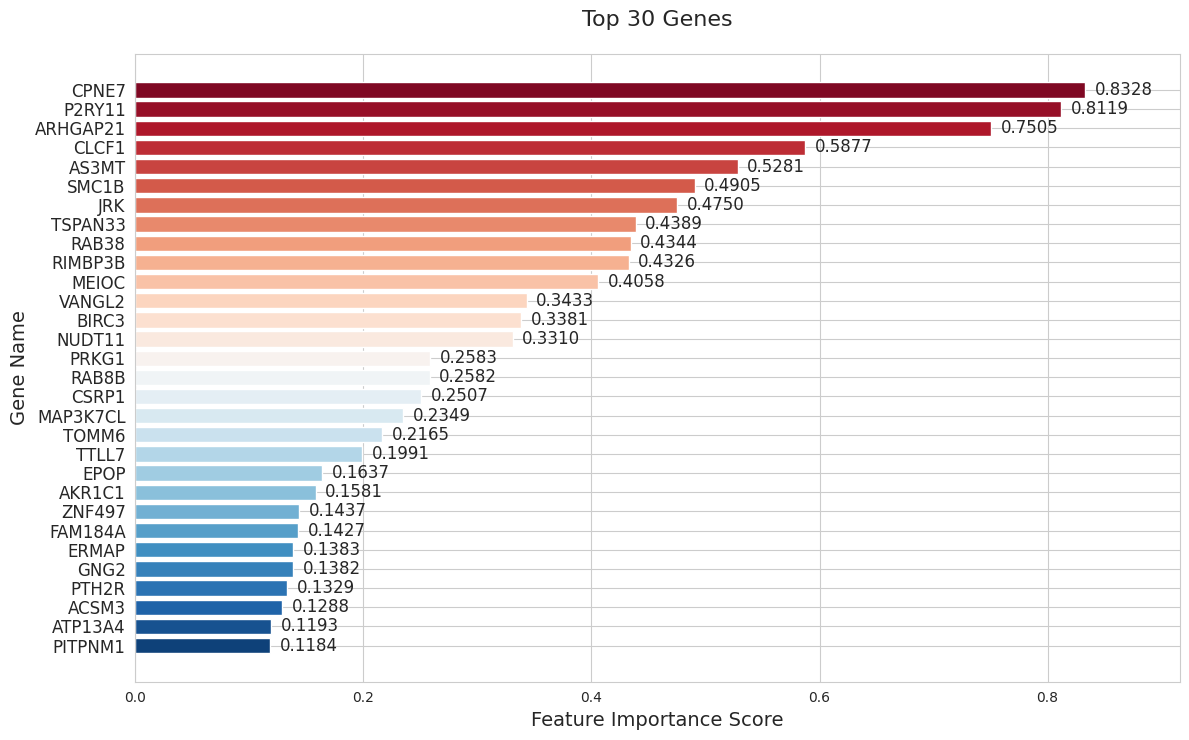

In [6]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=30, title="Top 30 Genes", save_file="plots/mutation/mds_mut_fimp_mrna_top_30.png")

In [7]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 100
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [8]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(35), tensor(0.), tensor(0.))

894


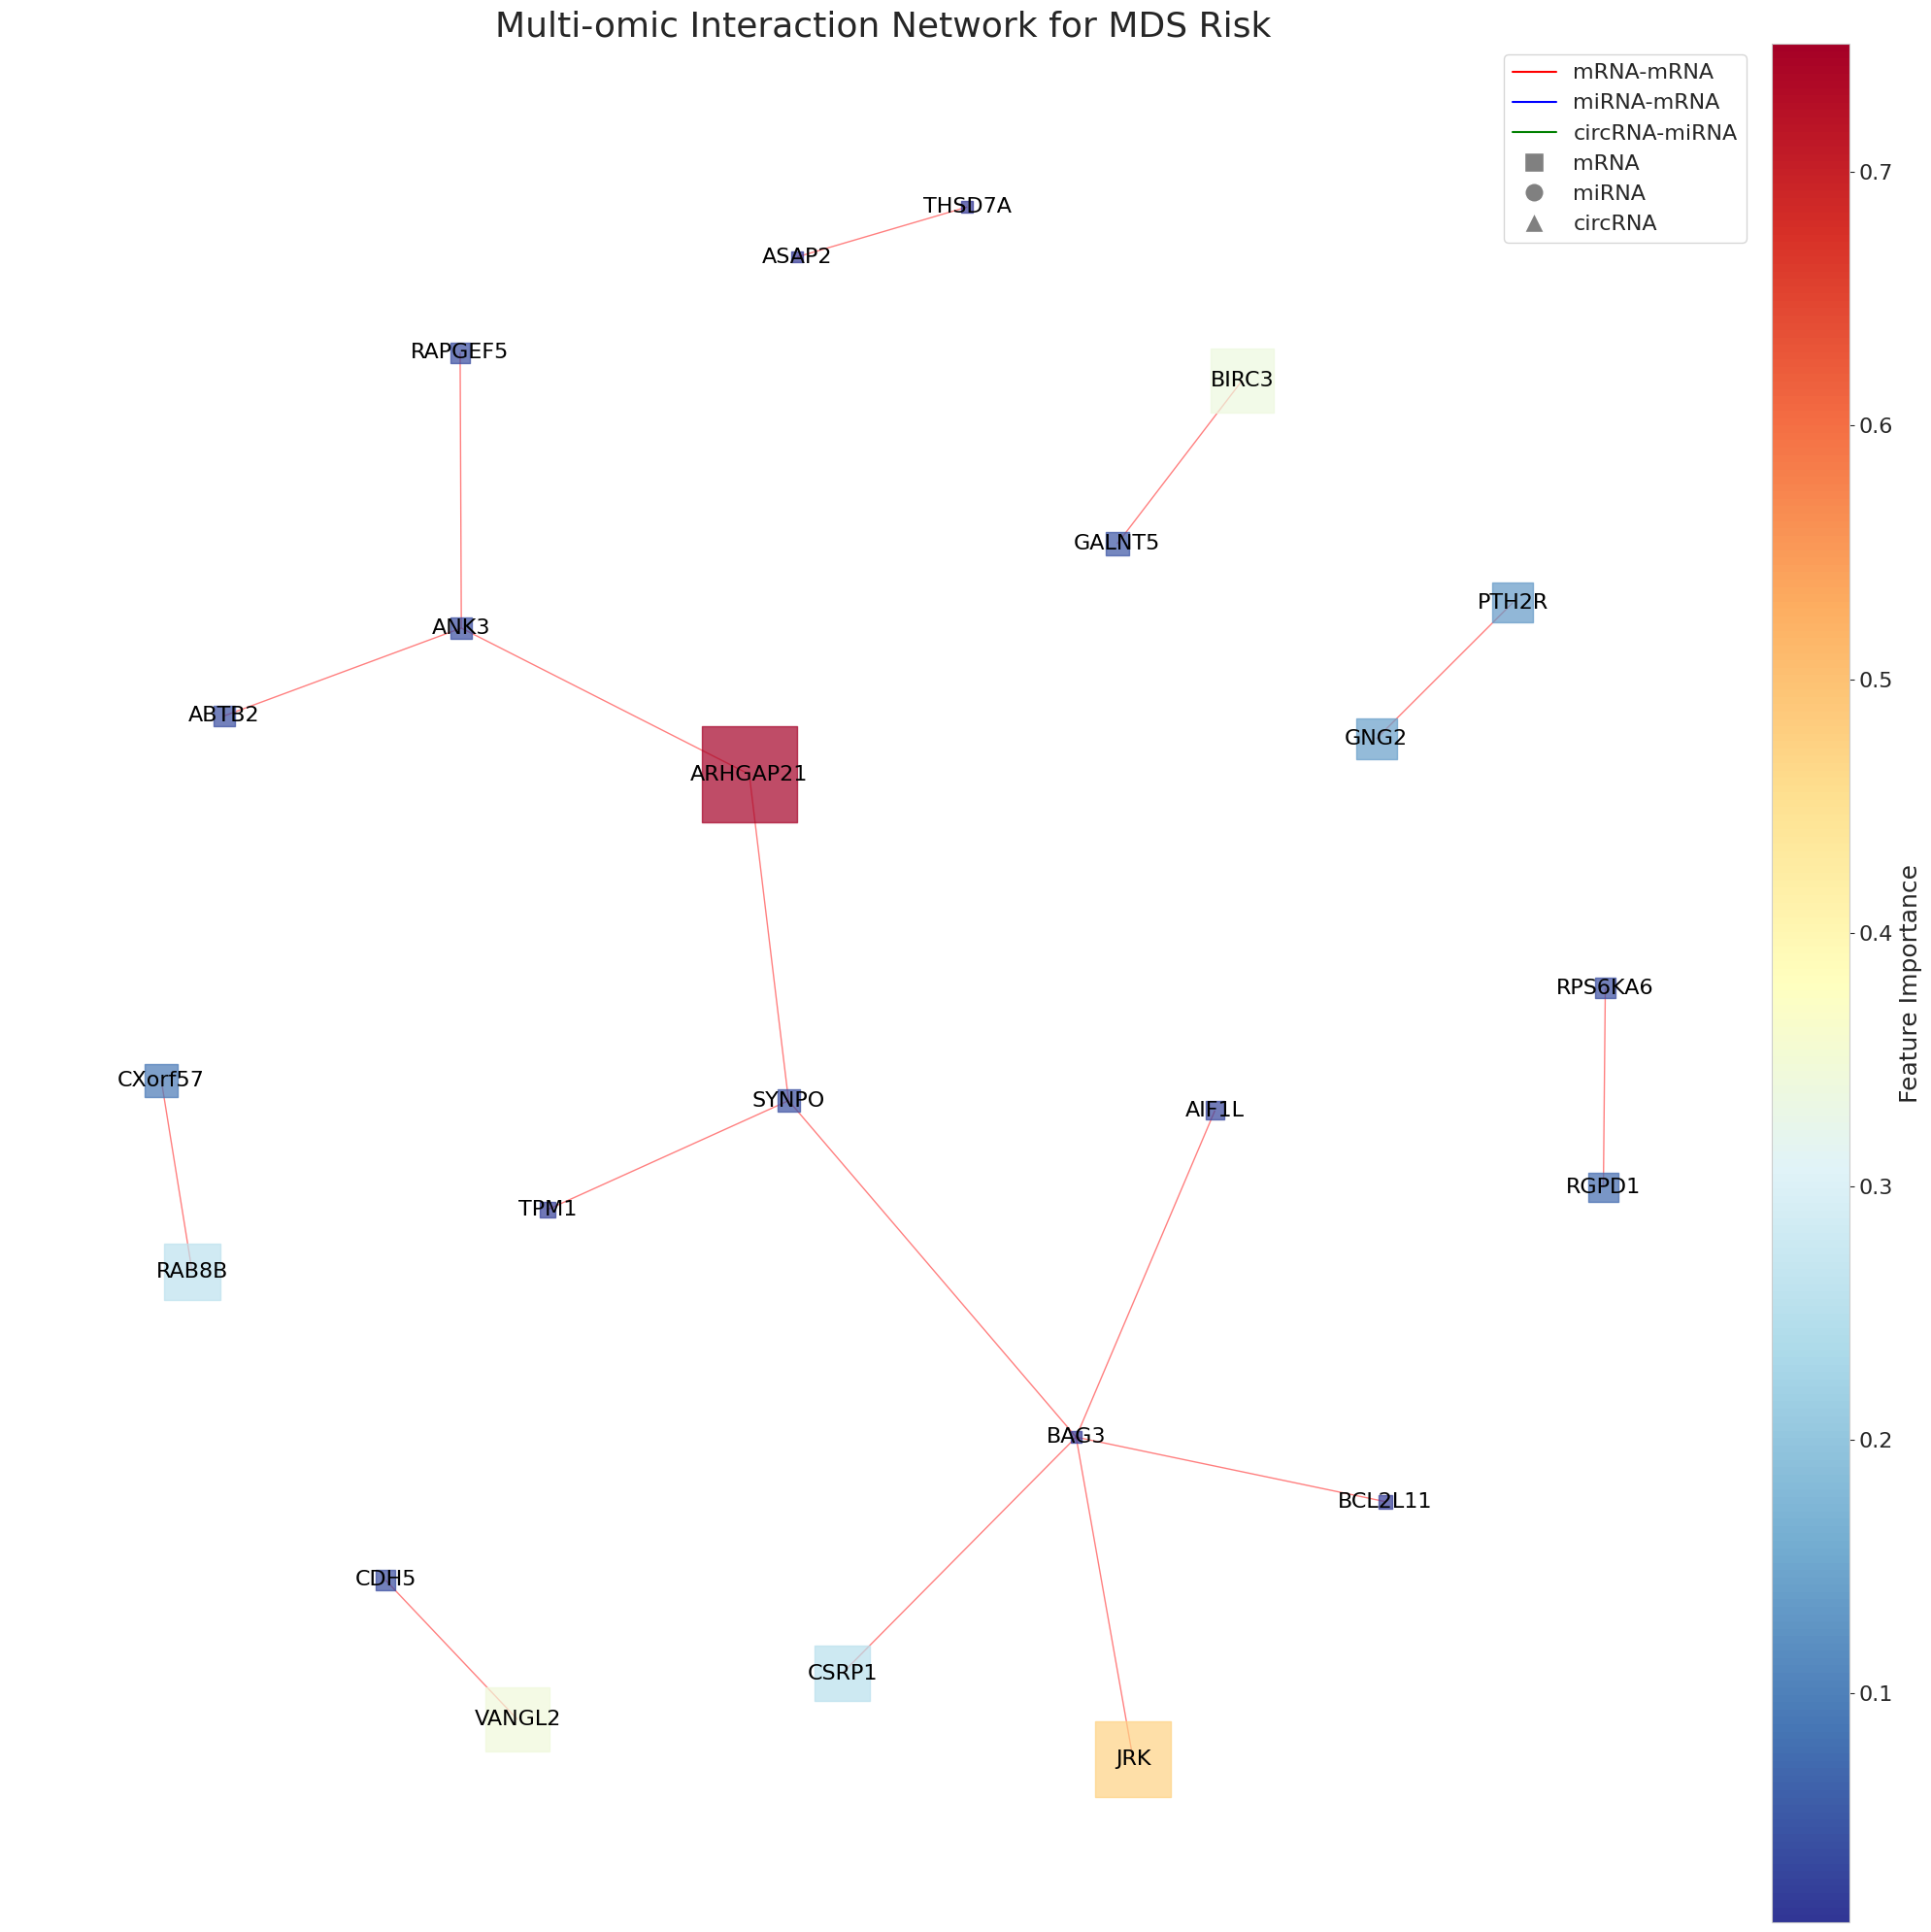

In [9]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
# seed = 4580 # - risk
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Risk",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
fig.savefig('plots/mutation/multi_omic_network_genes_only.png', dpi=100)

- [CPNE8 is linked to AML, CPNE7 is a candidate tumor suppresor gene](https://pmc.ncbi.nlm.nih.gov/articles/PMC8345009/)
 - [CXCL8 is associated with leukemia](https://faseb.onlinelibrary.wiley.com/doi/abs/10.1096/fj.201801931R) and [CXCL8 expression is promoted by CPNE7 overexpression](https://pmc.ncbi.nlm.nih.gov/articles/PMC8516970/)
- interestingly the mutated gene SF3B1 has not been selected as a significant feature
- MIR604 not a significant predictor
- findings for AML for P2RY11
    - Salvestrini, V. et al. Purinergic signaling inhibits human acute myeloblastic leukemia cell proliferation, migration, and engraftment in immunodeficient mice. Blood 119, 217–226 (2012).
    - Schnurr, M. et al. ATP gradients inhibit the migratory capacity of specific human dendritic cell types: implications for P2Y11 receptor signaling. Blood 102, 613–620 (2003).
    - [P2Ys, including P2Y11 are differentially expressed in different types of cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC10485639/)

[Alpha-Catenin, ARHGAP21 and β-Catenin Are Abnormally Expressed in Bone Marrow Cells From Patients with Myelodysplatic Syndromes and Are a Possible Target for Decitabine Treatment.](https://ashpublications.org/blood/article/114/22/1778/63241/Alpha-Catenin-ARHGAP21-and-Catenin-Are-Abnormally)
[ARHGAP21 Is Overexpressed in Bone Marrow of Acute Leukemia Patients and Interacts with Focal Adhesion Kinase (FAK) in Hematopoietic Cells. ](https://ashpublications.org/blood/article/108/11/4450/125957/ARHGAP21-Is-Overexpressed-in-Bone-Marrow-of-Acute)

In [14]:
mut_sample_ids = mrna_loader.get_fold(0)[0]['sample_ids'].to_list()

mrna = pl.read_csv("mds_data/raw/200625_allRNA_fromRNAseq_annot_hg38.tsv", separator="\t")
mrna_cols = [
    col.split("_")[0] for col in mrna.columns[6:]
]
rename_dict = dict(zip(mrna.columns[6:], mrna_cols))
mrna = mrna.rename(rename_dict)

mrna_cols = []
sf3b1 = (
    mrna
        .filter(pl.col("GENE_NAME") == "SF3B1")
        .drop("CHR", "START", "END", "GENE_TYPE", "GENE_ID", "GENE_NAME")
        .select(mut_sample_ids)
)
sf3b1
ss = mrna_loader.get_fold(0)[0].select(["sample_ids", "class"])

with pl.Config(tbl_cols=-1, tbl_rows=-1):
    print(ss)

class_0 = ss.filter(pl.col("class") == 0)['sample_ids'].to_list()
class_1 = ss.filter(pl.col("class") == 1)['sample_ids'].to_list()
class_0_exp = sf3b1.select(class_0).to_numpy()[0]
class_1_exp = sf3b1.select(class_1).to_numpy()[0]

import matplotlib.pyplot as plt

# plot this as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Class 0', 'Class 1'], [class_0_exp.mean(), class_1_exp.mean()])
plt.errorbar(['Class 0', 'Class 1'], [class_0_exp.mean(), class_1_exp.mean()], yerr=[class_0_exp.std(), class_1_exp.std()], capsize=5)
plt.ylabel('Expression')
# statistical test to compare the means
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(class_0_exp, class_1_exp)
print("T-statistic:", t_stat)
print("p-value:", p_val)

V108,V125,V1505,V1528,V1591,V1788,V1800,V1874,V2110,V2133,V2241,V359,V513,V624,V630,V637,V716,V777,V806,V888
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
36129,33185,52267,46423,43329,51512,40864,60640,31849,3948,25858,37425,36563,59770,48422,8937,58799,38037,35270,39524


In [11]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = (
    results
    .filter(pl.col("Adjusted P-value") < 0.05)
    .select(["Gene_set", "Term", "Adjusted P-value", "Genes"])
    .sort("Adjusted P-value")
)
significant_results = significant_results

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=1000, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (6, 4)
+-----------------+---------------------------------------------+------------------+-------------------------------------------------------------------------------------------------------------------+
| Gene_set        | Term                                        | Adjusted P-value | Genes                                                                                                             |
| ---             | ---                                         | ---              | ---                                                                                                               |
| str             | str                                         | f64              | str                                                                                                               |
+=====================================================================================================================================================================================

In [10]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=[
        "GO_Biological_Process_2023",
        "GO_Molecular_Function_2023",
        "GO_Cellular_Component_2023",
        # "Jensen_DISEASES",
        # "Human_Phenotype_Ontology"
    ],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)

significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (11, 4)
+----------------------------+------------------------------------------+------------------+-----------------------------------------------------------------------------------------------------------+
| Gene_set                   | Term                                     | Adjusted P-value | Genes                                                                                                     |
| ---                        | ---                                      | ---              | ---                                                                                                       |
| str                        | str                                      | f64              | str                                                                                                       |
+====================================================================================================================================================================================